In [2]:
source("../experiment_aws/sampling_utils.R")

[1] 4.77654
[1] 4.77654
Found a (sigma = 0.8, epsilon = 0) approximation
Found a (sigma = 0.9, epsilon = 0) approximation
Found a (sigma = 0.95, epsilon = 0) approximation
Found a (sigma = 0.99, epsilon = 0) approximation
Found a (sigma = 0.999, epsilon = 0) approximation


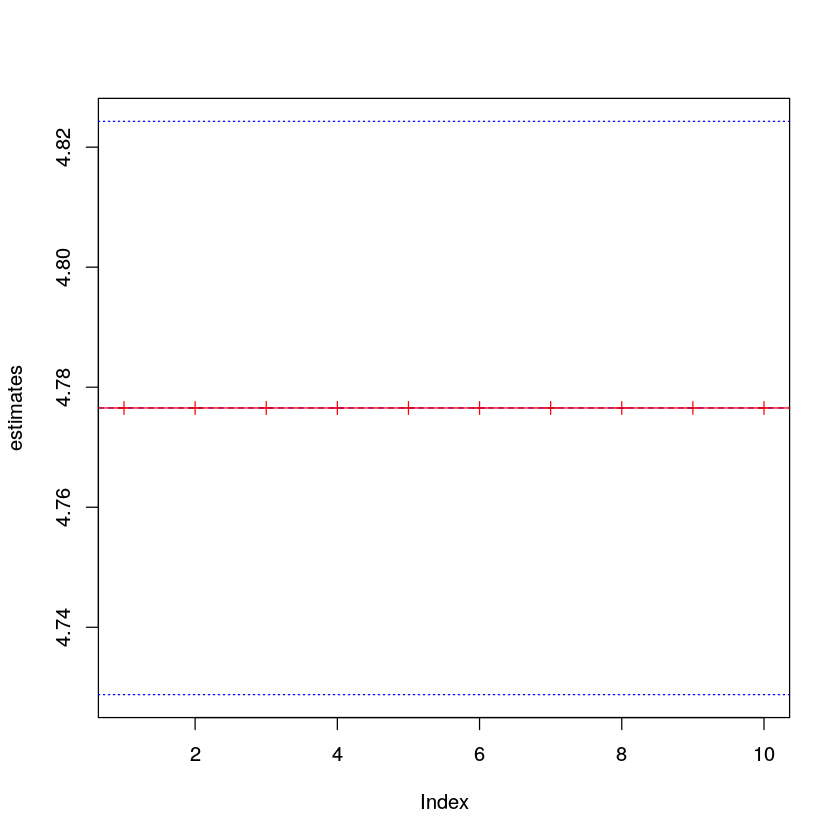

In [19]:
n=10;
m=20;
R=runif(n);#as.numeric(1:n);
w=R;

norm = sum(w);
w=w/norm;#!!!


n_repl=10;


#The following works for NORMALISED weights and SUM or AVG
#TODO: other aggregation functions
estimates = sort(sapply(1:n_repl,
    function(x) {
        S=sample(1:n,prob=w,m,replace=TRUE);
        sum_est = sum(R[S]*((w[S])^-1))/m;#Hansen-Hurwitz
        return(sum_est);
    }
));

print(sum(R))
print(mean(estimates))


plot(estimates,col="red",pch=3)
abline(h=sum(R),lty=2,col="blue")
abline(h=sum(R)*1.01,lty=3,col="blue")
abline(h=sum(R)*0.99,lty=3,col="blue")

abline(h=mean(estimates),lty=1,col="red")

rel_errs=sort(abs(estimates-sum(R))/sum(R))
show_sigma_levels(rel_errs)
#This is a good estimator, weighing w with the value of R is the best
#However, we cannot estimate the norm of w exactly. Would precomputing it make sense?

[1] "True sum:  50005000"
[1] "estimate:  42519986.0387983"


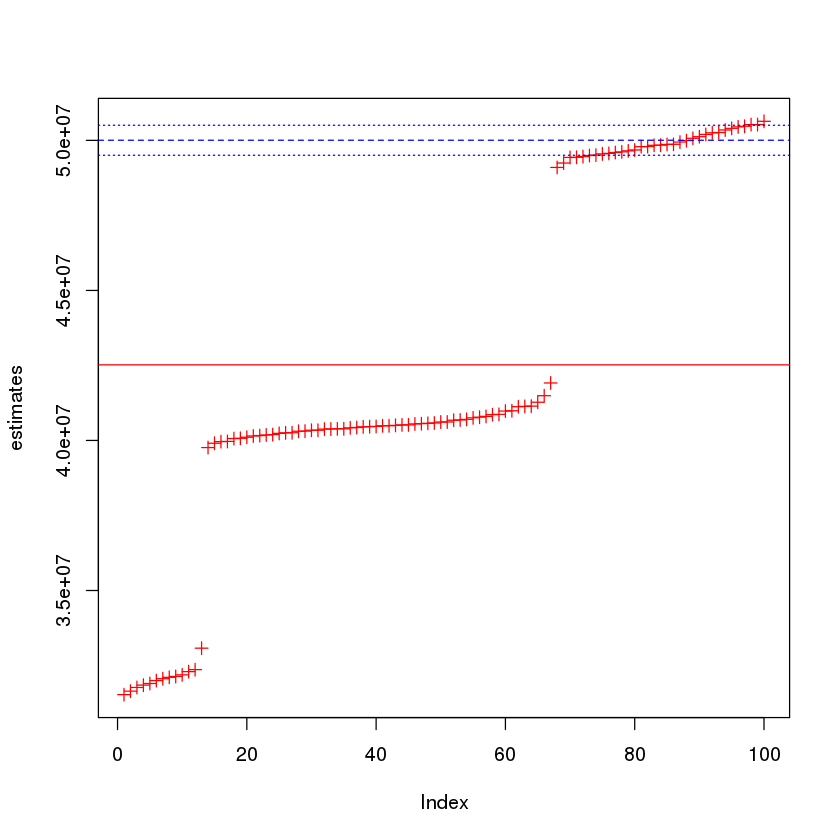

In [359]:
#Test with strata
n=10000;
m=200;
n_strata = 10;
R=as.numeric(1:n);#NOTE: for strata we assume sorted R
#w=c(sapply(runif(n_strata),function(x) replicate(n/n_strata,x)));
w=c(sapply((n_strata+1-1:n_strata)^2,function(x) replicate(n/n_strata,x)));
strata_boundaries = (0:n_strata)*n/n_strata;

strata_weights=sapply(1:n_strata,function(p) w[p*n/n_strata-1]);
strata_sizes = replicate(n_strata,n/n_strata);

total_strata_weight = sum(strata_weights*strata_sizes);

n_repl=100;


#TODO: other aggregation functions
estimates = sort(sapply(1:n_repl,
    function(x) {
        S=sort(sample(R,prob=w,m,replace=TRUE));
        sum_est = 0;
        for(i in 1:n_strata) {
            stratum_min_index = strata_boundaries[i]+1;
            stratum_max_index = strata_boundaries[i+1];
            stratum_sample = S[S>=R[stratum_min_index]&S<=R[stratum_max_index]];
            
            if(length(stratum_sample) == 0) {
                next;
            }
            sum_est_term = mean(stratum_sample)*strata_sizes[i];
            sum_est = sum_est + sum_est_term;
        }
        return(sum_est);
    }
));

print(paste("True sum: ",sum(R)));
print(paste("estimate: ",mean(estimates)));


plot(estimates,col="red",pch=3)
abline(h=sum(R),lty=2,col="blue")
abline(h=sum(R)*1.01,lty=3,col="blue")
abline(h=sum(R)*0.99,lty=3,col="blue")

abline(h=mean(estimates),lty=1,col="red")

#This estimator works if the weights are not too extreme
#The weights are "too extreme" if some strata are undersampled
#I expect that the jumps in the estimate stem from the sample size in a small (and important) stratum

[1] "True sum:  50005000"
[1] "estimate:  47357899.2472842"


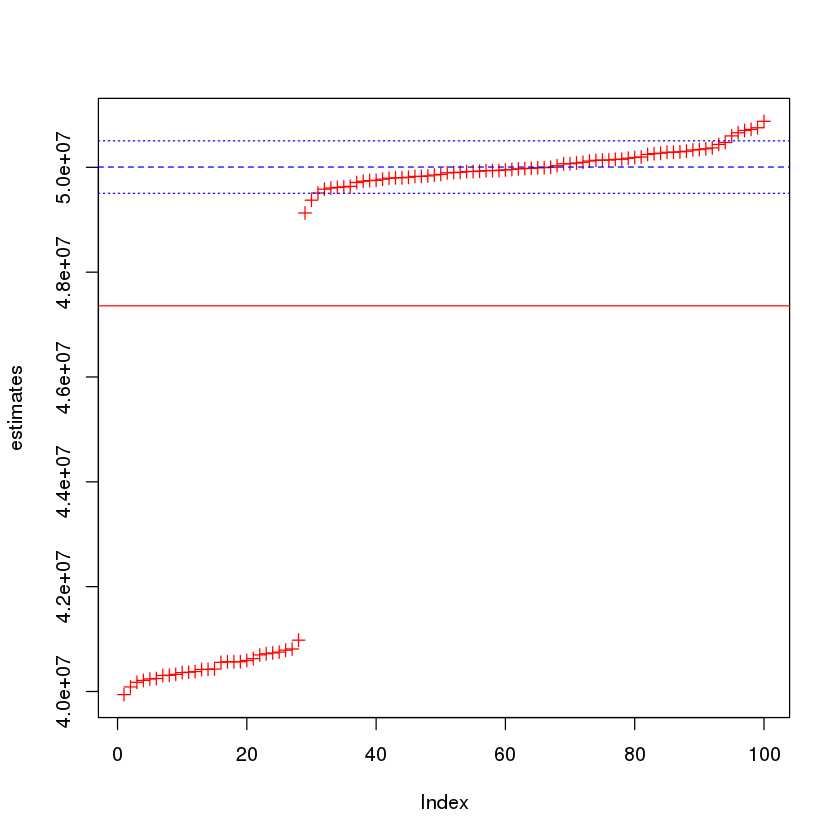

In [360]:
#This is just a slight reformulation of the above, too make it look like equation (5.1) (page 91) in Cochran.

#Test with strata
n=10000;
m=200;
n_strata = 10;
R=as.numeric(1:n);#NOTE: for strata we assume sorted R
#w=c(sapply(runif(n_strata),function(x) replicate(n/n_strata,x)));
w=c(sapply((n_strata+1-1:n_strata)^1.5,function(x) replicate(n/n_strata,x)));
strata_boundaries = (0:n_strata)*n/n_strata;

strata_weights=sapply(1:n_strata,function(p) w[p*n/n_strata-1]);
strata_sizes = replicate(n_strata,n/n_strata);

total_strata_weight = sum(strata_weights*strata_sizes);

n_repl=100;


#TODO: other aggregation functions
estimates = sort(sapply(1:n_repl,
    function(x) {
        S=sort(sample(R,prob=w,m,replace=TRUE));
        avg_est = 0;
        for(i in 1:n_strata) {
            stratum_min_index = strata_boundaries[i]+1;
            stratum_max_index = strata_boundaries[i+1];
            stratum_sample = S[S>=R[stratum_min_index]&S<=R[stratum_max_index]];
            
            if(length(stratum_sample) == 0) {
                next;
            }
            #avg_est_term = mean(stratum_sample)*strata_sizes[i]*strata_weights[i]/total_strata_weight;
            avg_est_term = mean(stratum_sample)*strata_sizes[i]/n;
            avg_est = avg_est + avg_est_term;
        }
        sum_est = avg_est * n;
        return(sum_est);
    }
));

print(paste("True sum: ",sum(R)));
print(paste("estimate: ",mean(estimates)));


plot(estimates,col="red",pch=3)
abline(h=sum(R),lty=2,col="blue")
abline(h=sum(R)*1.01,lty=3,col="blue")
abline(h=sum(R)*0.99,lty=3,col="blue")

abline(h=mean(estimates),lty=1,col="red")
